In [1]:
# https://drive.google.com/file/d/1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm/view

In [2]:
import matplotlib.pyplot as plt
import cv2

% matplotlib inline

In [3]:
cat4 = cv2.imread('../large_data/CATS_DOGS/train/CAT/4.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

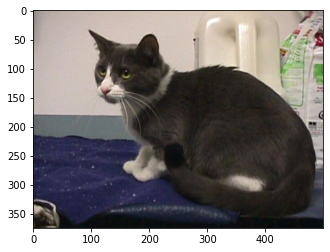

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog2 = cv2.imread('../large_data/CATS_DOGS/train/DOG/2.jpg')

In [9]:
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

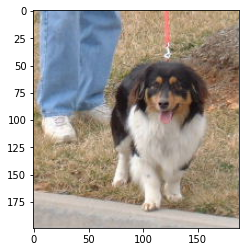

In [10]:
plt.imshow(dog2)

In [11]:
dog2.shape

(199, 188, 3)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=(1 / 255),
                               shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

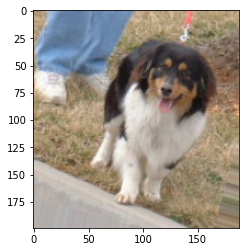

In [15]:
plt.imshow(image_gen.random_transform(dog2))

In [18]:
image_gen.flow_from_directory('../large_data/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [21]:
input_shape = (150, 150, 3)

In [19]:
from keras.models import Sequential

In [22]:
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [26]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('../large_data/CATS_DOGS/train', target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary')

Found 18743 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory('../large_data/CATS_DOGS/test', target_size=input_shape[:2],
                                               batch_size=batch_size, class_mode='binary')

Found 6251 images belonging to 2 classes.


In [28]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [30]:
# Normally, epoch could be alot more. e.g. 100
results = model.fit(train_image_gen, epochs=1, steps_per_epoch=150, validation_data=test_image_gen,
                    validation_steps=12)

150/150 [==============================] - 43s 289ms/step - loss: 0.6945 - accuracy: 0.4863 - val_loss: 0.6946 - val_accuracy: 0.4740


In [32]:
results.history['accuracy']

[0.48625001311302185]

In [33]:
from keras.models import load_model

In [34]:
new_model = load_model('cat_dog_100epochs.h5')

In [35]:
dog_file = '../large_data/CATS_DOGS/test/DOG/10005.jpg'

In [44]:
import numpy as np
from keras.utils import load_img, img_to_array

In [45]:
dog_img = load_img(dog_file, target_size=(150, 150))
dog_img = img_to_array(dog_img)

In [46]:
dog_img.size

67500

In [47]:
dog_img = np.expand_dims(dog_img, axis=0)

In [48]:
dog_img.shape

(1, 150, 150, 3)

In [49]:
dog_img = dog_img / 255

In [50]:
prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 207ms/step


In [51]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.49762544]] 
